In [63]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import math
import plotly.graph_objects as go
from collections import OrderedDict
from matplotlib.lines import Line2D  # Import for creating custom legend markers
import json
import copy
import random
import re
import seaborn as sns
import importlib


# Import BW25 packages
import bw2data as bd
import bw2io as bi
import bw2calc as bc
import bw2analyzer as bwa
import brightway2 as bw 
from bw2calc import LeastSquaresLCA

In [87]:
from  standards import *
import Monte_Carlo as MC
import life_cycle_assessment as lc
import LCA_plots as lp


importlib.reload(MC)
importlib.reload(lc)
importlib.reload(lp)

Folder name Results created


<module 'LCA_plots' from 'c:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\LCA_plots.py'>

In [65]:
db_type = 'CONSQ'
lcia_method = 'recipe'

save_dir = results_folder('Results')

file_name = f'Results\Ananas - {db_type}_{lcia_method}.xlsx'
file_cont_name = f'Results\Ananas contribution - {db_type}_{lcia_method}.xlsx'
sheet_name = 'Ananas'

path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

# Your name variable should be the name of the project.
database_project = "RA - Ofir & Stine 1"
database_name = "Ananas consq"

flows = [f'alubox - {db_type}', f'PP sheet sc2 - {db_type}', f'PP sheet sc3 - {db_type}']
flow_legend = [f'AL', f'PPIC', f'PPREC']

directory = 'C:\\Users\\ruw\\Desktop\\RA\\'

calculate_lcia = False
calculate_cont = True

Folder name Results created


In [66]:
FU, FU_proc, impact_category, plot_x_axis_all, sub_product_details = lc.LCA_initialization(database_project, database_name, flows, lcia_method, db_type)

if calculate_lcia is True:
    # Caculating the LCA results
    df = lc.life_cycle_impact_assessment(flows, FU, impact_category, FU_proc)
    lc.save_LCA_results(df, file_name, sheet_name, impact_category)

df = lc.import_LCA_results(file_name, flows, impact_category)



Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed


In [67]:
if 'recipe' in lcia_method:
    df_test, df_endpoint = lc.recipe_dataframe_split(df)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        plot_x_axis.append(string[0])

else:
    df_test = df
    plot_x_axis = plot_x_axis_all


In [68]:
# # Processing the LCA results
sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, f'df_idx_ofir_{db_type}', lcia_method, db_type)
flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)


Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database already present!!! No setup is needed
Recipe is selected
Initialization is completed
Consq EcoInvent
Biosphere database alrea

In [70]:
if calculate_cont == True:    
    fu_sub_updated = lc.process_update(FU, functional_unit_sub)
    
    df_cont = lc.LCIA_contribution(impact_category[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)
    lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impact_category)
    df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])


Processing flow: alubox raw materials - CONSQ in impact category: climate change
'market for aluminium, wrought alloy' (kilogram, GLO, None) Calculation 1 of 170, Score: 0.1485380900269693 climate change
'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None) Calculation 2 of 170, Score: 0.012116024645388126 climate change
row : 0, col : 0 is assigned list : [["'market for aluminium, wrought alloy' (kilogram, GLO, None)", 0.1485380900269693], ["'steel production, chromium steel 18/8, hot rolled' (kilogram, RER, None)", 0.012116024645388126]]
Processing flow: alubox production - CONSQ in impact category: climate change
'anodising, aluminium sheet' (square meter, RER, None) Calculation 3 of 170, Score: 0.006501365638450255 climate change
'impact extrusion of aluminium, 4 strokes' (kilogram, RER, None) Calculation 4 of 170, Score: 0.010038418916427238 climate change
'corrugated board box production' (kilogram, RER, None) Calculation 5 of 170, Score: 0.0029745883882404778

In [71]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_test)


In [72]:
df_col = [df_test.columns[1]]
df_GWP = df_test[df_col]

unique_elements = lc.unique_elements_list(df_GWP, db_type)
colors = plot_colors(unique_elements,'turbo')


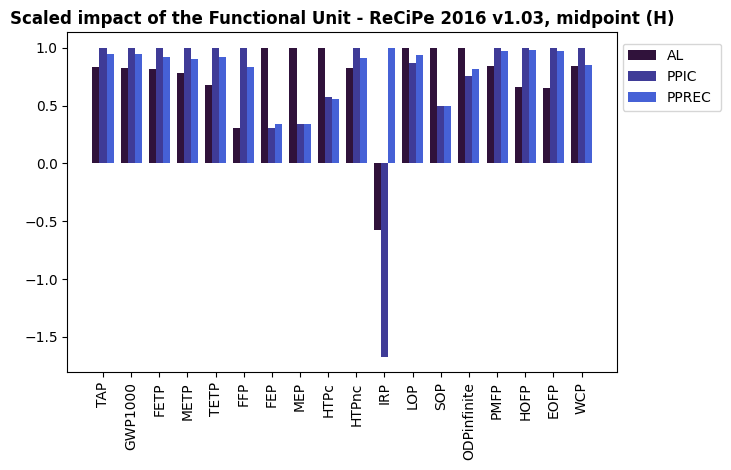

In [73]:
lp.scaled_FU_plot(df_scaled, plot_x_axis, colors, flow_legend, save_dir, db_type, impact_category)

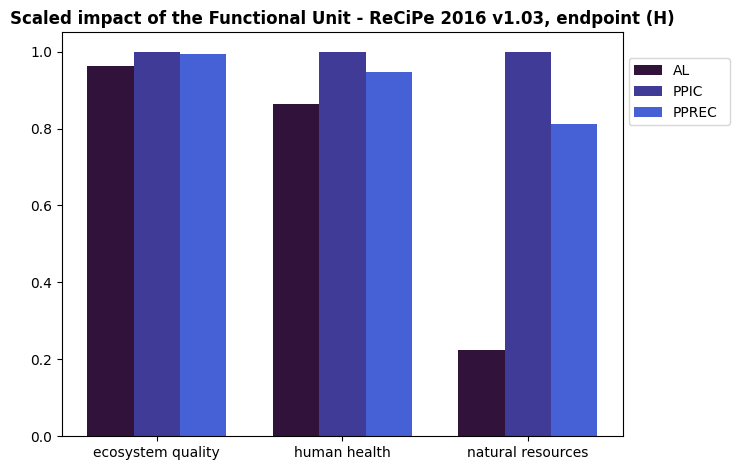

In [74]:
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, colors, flow_legend, save_dir, db_type, impact_category[-3:])


In [75]:
if 'recipe' not in lcia_method:
    lp.single_score_plot(directory, df_tot, colors, flow_legend, save_dir, db_type)

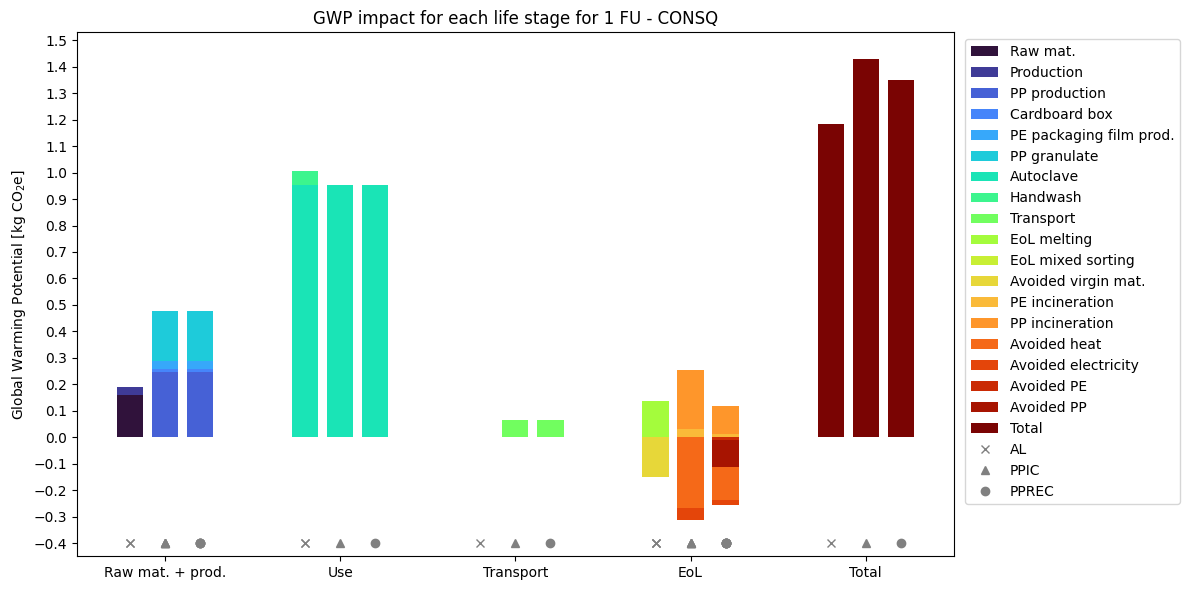

In [89]:
# Categories definitions
categories, category_mapping = lp.category_organization(database_name)

lp.gwp_lc_plot(df_GWP, flow_legend, category_mapping, colors, categories, save_dir, db_type, database_name)

In [77]:
cont_idx = df_c.index
cont_idx = list(cont_idx)

for flow in range(1,len(flows)+1):
    # flow += 1
    for ix in cont_idx:
        if f'{flow}' in ix:
            print(flow, ix)

1 alubox raw materials - CONSQ - sc 1
1 alubox production - CONSQ - sc 1
1 autoclave - CONSQ - sc 1
1 Handwash - CONSQ - sc 1
1 alubox EoL melting - CONSQ - sc 1
1 alubox EoL mixed sorting - CONSQ - sc 1
1 transport Alu - CONSQ - sc 1
1 avoided alubox raw materials - CONSQ - sc 1
2 pp production - CONSQ - sc 2
2 autoclave - CONSQ - sc 2
2 market for corrugated board box - sc 2
2 packaging film production, low density polyethylene - sc 2
2 market for polypropylene, granulate - sc 2
2 transport Plastic - CONSQ - sc 2
2 PE incineration no Energy Recovery - CONSQ - sc 2
2 PP incineration no Energy Recovery - CONSQ - sc 2
2 marginal heating grid projection updated - CONSQ - sc 2
2 energy avoided electricity from energy recovery - CONSQ - sc 2
3 pp production - CONSQ - sc 3
3 autoclave - CONSQ - sc 3
3 market for corrugated board box - sc 3
3 packaging film production, low density polyethylene - sc 3
3 market for polypropylene, granulate - sc 3
3 polyethylene, high density, granulate, recycl

In [78]:
def node_name_update(node):
    if '- APOS - sc 1' in node:
        node = node.replace(f' - APOS - sc 1', '')
        if  'avoided alubox raw materials' in node:
            node = 'Avoided raw mat.'
        elif 'melting' in node:
            node = 'Melting'
        elif 'mixed sorting' in node:
            node = 'Mixed sorting'
        elif 'prod' in node:
            node = 'Alubox prod.'
        else:
            node = node.title()
    elif 'wrought alloy' in node:
        node = 'Virgin alu'
    elif 'steel production' in node:
        node = 'Virgin steel'
    elif 'impact extrusio' in node:
        node = 'Alu impact extrusion'
    elif 'corrugated' in node:
        node = 'Cardboard box'
    elif 'anodising' in node:
        node = 'Alu anodising'
    elif 'transport' in node:
        node = 'Transport'
    
    return node

In [79]:
def source_name_update(process, source):
        
    if 'wrought alloy' in source:
        source = 'Alu wrought alloy'
    elif 'steel production' in source:
        source = 'Virgin steel'
    elif 'anodising' in source:
        source = 'Alu anodising'
    elif 'impact extrusio' in source:
        source = 'Alu impact extrusion'
    elif 'transport' in source:
        source = 'Transport'
    elif 'corrugated' in source:
        source = 'Cardboard box'
    elif 'metal working' in source:
        source = 'Steel manufacturing'
    elif 'sheet rolling' in source:
        source = 'Alu sheet rolling'
    elif 'recycling' in source:
        if 'mixed sorting' in process.lower():
            source = 'Mixed metal scrap'
        else:
            source = 'Alu remelting'
    elif 'autoclave' in source:
        source = 'Autoclave'
    elif 'Handwash' in source:
        source = 'Handwash'
    return source

In [80]:
# df_c_gwp =copy.deepcopy(df_c)
# c = []

# node_sc1 = ['Raw material','Production', 'Use', 'EoL', 'EoL Treatment']
# node_sc2 = []
# node_sc3 = []

# links_sc1 = []
# links_sc2 = []
# links_sc3 = []

# for i, row in df_c_gwp.iterrows():
#     if 'sc 1' in i:
#         # print(i)
#         node = node_name_update(i)
#         # if  'disinfec' not in i:
#         node_sc1.append(node)
#         for element in row:

#             for proc in element:
#                 # print(proc)
#                 val = round(proc[1]/GWP_value[0][-1]*100,2)
#                 source = proc[0]
#                 source = source_name_update(i,source)
#                 # print(source)
#                 if   val != 0:

#                     if  val < 0 and 'Cardboard' not in source:
#                         # print(proc[0])
#                         source = 'Avoided ' + source.lower()

#                     if 'raw material' in i and 'avoided' not in source.lower():
#                         print(f'{i} : Raw : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'Raw material', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": 'Production', "value":val}
#                         # dct_temp3 = {"source": node, "target": 'Production', "value":val}
#                     if 'production' in i or 'transport' in source.lower():
#                         print(f'{i} : Prod. : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'Production', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": 'Use', "value":val}
#                         # dct_temp3 = {"source": node, "target": 'Use', "value":val}
#                     if 'autoclave' in i.lower() or 'handwash' in i.lower():
#                         print(f'{i} : Use : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'Use', "target": source, "value": val}
#                         dct_temp2 = {"source": source, "target": 'EoL', "value": val}
#                     if  'avoided' in i.lower():
                        
#                         if 'alu' in source.lower():
#                             val = round(val * 0.95, 2) 
#                         elif 'steel' in source.lower():
#                             val = round(val * 0.65, 2) 
#                         print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'EoL', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": node, "value":val}
#                     if 'eol' in i.lower() and 'avoided' not in i.lower():
#                         print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
#                         dct_temp = {"source": 'EoL', "target": source, "value":val}
#                         dct_temp2 = {"source": source, "target": 'EoL Treatment', "value":val}

                
#                     links_sc1.append(dct_temp)
#                     links_sc1.append(dct_temp2)
#                     # if dct_temp3 not in links_sc1:
#                     #     links_sc1.append(dct_temp3)
#                     node_sc1.append(source)


In [81]:
colors

[(0.18995, 0.07176, 0.23217, 1.0),
 (0.24539, 0.23044, 0.59142, 1.0),
 (0.27334, 0.38008, 0.84037, 1.0),
 (0.27381, 0.52069, 0.97899, 1.0),
 (0.21382, 0.65886, 0.97959, 1.0),
 (0.11639, 0.7974, 0.85559, 1.0),
 (0.10342, 0.896, 0.715, 1.0),
 (0.23449, 0.96065, 0.55614, 1.0),
 (0.44321, 0.99551, 0.37345, 1.0),
 (0.64362, 0.98999, 0.23356, 1.0),
 (0.78563, 0.93579, 0.20336, 1.0),
 (0.90605, 0.84337, 0.22188, 1.0),
 (0.98, 0.73, 0.22161, 1.0),
 (0.99593, 0.58703, 0.16899, 1.0),
 (0.96187, 0.41093, 0.0931, 1.0),
 (0.89298, 0.26981, 0.03993, 1.0),
 (0.79125, 0.16368, 0.01387, 1.0),
 (0.65345, 0.07902, 0.00408, 1.0),
 (0.4796, 0.01583, 0.01055, 1.0)]

In [82]:
color_links = []
color_nodes = []
for c in colors:
    c_link = list(c)  # Convert tuple to list if needed
    c_node = list(c)

    c_link = f"rgba({c[0]}, {c[1]}, {c[2]}, .5)"  # Update the last element
    c_node = f"rgba({c[0]}, {c[1]}, {c[2]}, 1)"

    color_links.append(c_link)  # Add the updated list to c_new
    color_nodes.append(c_node)

c_node

'rgba(0.4796, 0.01583, 0.01055, 1)'

In [83]:
sankey_color = colors



In [84]:
list(sankey_color[0])

[0.18995, 0.07176, 0.23217, 1.0]

In [85]:
len(color_nodes)

19

In [86]:
df_c_gwp =copy.deepcopy(df_c)
c = []

node_sc1 = ['Raw material','Production', 'Use', 'EoL', 'EoL Treatment']
node_sc2 = []
node_sc3 = []



links_sc1 = []
links_sc2 = []
links_sc3 = []

node_colors_links = {}
node_colors = {}

link_opacity = 0.3
node_opacity = 0.9

pos = -3
neg = 6

for i, c in enumerate(node_sc1):
    node_colors_links[c] =color_links[pos]
    if i == 0:
        node_colors[c] = color_nodes[i+1]
    else:
        node_colors[c] = color_nodes[i+4]

for i, row in df_c_gwp.iterrows():
    if 'sc 1' in i:
        # print(i)
        node = node_name_update(i)
        # if  'disinfec' not in i:
        node_sc1.append(node)
        for element in row:

            for proc in element:
                # print(proc)
                val = round(proc[1]/GWP_value[0][-1]*100,2)
                source = proc[0]
                source = source_name_update(i,source)
                # print(source)
                if   val != 0:
                    node_colors_links[source] = color_links[pos]
                    if  val < 0 and 'Cardboard' not in source:
                        # print(proc[0])
                        source = 'Avoided ' + source.lower()

                        node_colors_links[source] = color_links[neg]

                    if 'raw material' in i and 'avoided' not in source.lower():
                        print(f'{i} : Raw : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Raw material', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Production', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Production', "value":val}
                        node_colors[source] = color_nodes[2]
                        node_colors[node] = color_nodes[0]

                    if 'production' in i or 'transport' in source.lower():
                        print(f'{i} : Prod. : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Production', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'Use', "value":val}
                        # dct_temp3 = {"source": node, "target": 'Use', "value":val}
                        node_colors[source] = color_nodes[5]
                        node_colors[node] = color_nodes[6]

                    if 'autoclave' in i.lower() or 'handwash' in i.lower():
                        print(f'{i} : Use : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'Use', "target": source, "value": val}
                        dct_temp2 = {"source": source, "target": 'EoL', "value": val}
                        node_colors[source] = color_nodes[4]
                        node_colors[node] = color_nodes[3]
                        
                    if  'avoided' in i.lower():
                        if 'alu' in source.lower():
                            val = round(val * 0.95, 2) 
                        elif 'steel' in source.lower():
                            val = round(val * 0.65, 2) 
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": node, "value":val}
                        node_colors[source] = color_nodes[13]
                        node_colors[node] = color_nodes[11]
                        
                    if 'eol' in i.lower() and 'avoided' not in i.lower():
                        print(f'{i} : EoL : {node}, source : {source}, GWP : {val}')
                        dct_temp = {"source": 'EoL', "target": source, "value":val}
                        dct_temp2 = {"source": source, "target": 'EoL Treatment', "value":val}
                        node_colors[source] = color_nodes[13]
                        node_colors[node] = color_nodes[11]
                
                    links_sc1.append(dct_temp)
                    links_sc1.append(dct_temp2)
                    # if dct_temp3 not in links_sc1:
                    #     links_sc1.append(dct_temp3)
                    node_sc1.append(source)


NameError: name 'GWP_value' is not defined

In [ ]:
len(colors)

15

In [ ]:

# Create a Sankey diagram
fig = go.Figure()

# Calculate the scale factor for link thickness and node size
max_value = max(abs(link['value']) for link in links_sc1)
scale_factor = 1  # You can adjust this factor to control the scaling

# Calculate total outflow for each node and round to 2 decimals
outflow_totals = {node: round(sum(link['value'] for link in links_sc1 if link['source'] == node), 2) for node in node_sc1}

# Calculate total inflow for each node and round to 2 decimals
inflow_totals = {node: round(sum(link['value'] for link in links_sc1 if link['target'] == node), 2) for node in node_sc1}

# Determine if a node has only incoming flows
incoming_only = {node: inflow_totals[node] > 0 and outflow_totals[node] == 0 for node in node_sc1}

# Calculate y-coordinates for nodes based on total outflow or inflow
node_y_coordinates = [sum(inflow_totals[node] if incoming_only[node] else outflow_totals[node] for node in node_sc1[:i]) for i in range(len(node_sc1))]
incoming_only['Avoided raw mat.'] = True
incoming_only['EoL Treatment'] = True
# incoming_only['Avoided chromium steel'] = True

# Add links
fig.add_trace(go.Sankey(
    node=dict(
        pad=50,
        thickness=10,
        line=dict(width=[abs(link['value']) / max_value * scale_factor for link in links_sc1]),
        label=[f"{node}<br>{inflow_totals[node] if incoming_only[node] else outflow_totals[node]}%" for node in node_sc1],
        color=[node_colors[node] for node in node_sc1],
    ),
    link=dict(
        source=[node_sc1.index(link['source']) for link in links_sc1],
        target=[node_sc1.index(link['target']) for link in links_sc1],
        value=[abs(link['value']) for link in links_sc1],
        color=[node_colors_links[link['source']] for link in links_sc1],  # Use source node color for links
        line=dict(width=[abs(link['value']) / max_value * scale_factor for link in links_sc1]),
    ),
    arrangement="perpendicular",
    domain=dict(x=[0, 1], y=[0, 1]),
))


# Show the figure
fig.show()
# fig.write_image("Sankey_alubox_consq.jpg")
